<a href="https://colab.research.google.com/github/cabrelharerimana/Netflix-Content-Analysis/blob/main/NetflixContentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/dataset/netflix_titles.csv")

In [7]:
# Remove Leading/trailing spaces
df["date_added"] = df["date_added"].str.strip()

In [8]:
#convert to datetime(ignore errors if some dates are missing/invalid)
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

In [9]:
# Extract year Netflix added the show
df["year_added"] = df["date_added"].dt.year

In [10]:
# count how many shows/movies added each year
content_trend = df.groupby("year_added")["title"].count()
print(content_trend)

year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      24
2015.0      82
2016.0     429
2017.0    1188
2018.0    1649
2019.0    2016
2020.0    1879
2021.0    1498
Name: title, dtype: int64


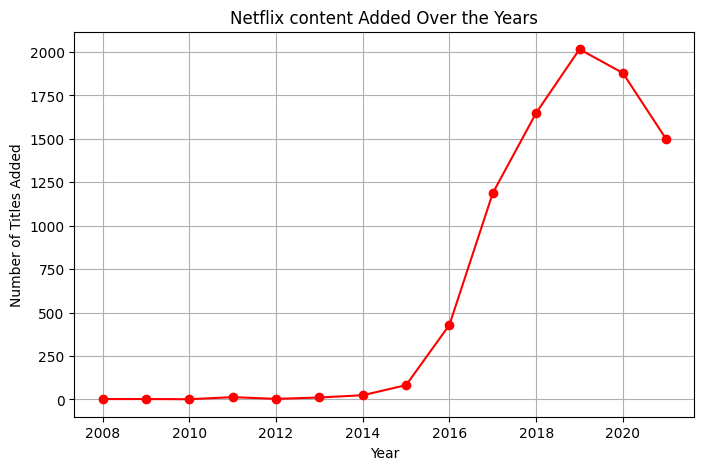

In [12]:
# plot the trend
plt.figure(figsize=(8,5))
content_trend.plot(kind="line", marker="o", color="red")
plt.title("Netflix content Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.show()



In [15]:
#count number of movies and tv Shows
type_counts = df["type"].value_counts()
print(type_counts)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [21]:
# Group by year and type
trend = df.groupby(["year_added", "type"])["show_id"].count().reset_index()

# Pivot to separate Movies and TV shows into columns
trend_pivot = trend.pivot(index="year_added", columns="type", values="show_id").fillna(0)

print(trend_pivot.head())

type        Movie  TV Show
year_added                
2008.0        1.0      1.0
2009.0        2.0      0.0
2010.0        1.0      0.0
2011.0       13.0      0.0
2012.0        3.0      0.0


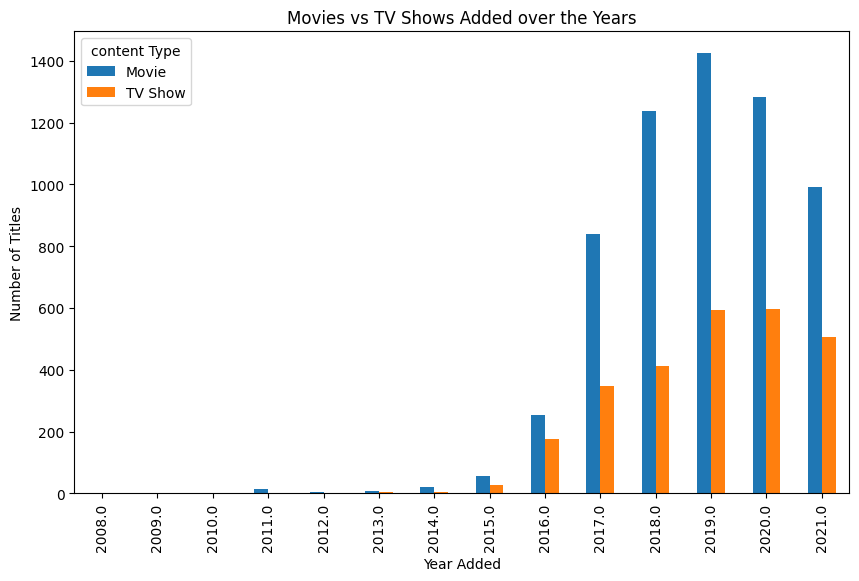

In [23]:
# Plot
trend_pivot.plot(kind="bar", stacked=False, figsize=(10,6))
plt.title("Movies vs TV Shows Added over the Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.legend(title="content Type")
plt.show()